In [4]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [7]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [8]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [9]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [10]:
df.describe

<bound method NDFrame.describe of      Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
886         0       2    male  27.0  13.0000
887         1       1  female  19.0  30.0000
888         0       3  female   NaN  23.4500
889         1       1    male  26.0  30.0000
890         0       3    male  32.0   7.7500

[891 rows x 5 columns]>

In [11]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [12]:
inputs

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000
888,3,2,29.699118,23.4500
889,1,1,26.000000,30.0000


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=20)

In [14]:
from sklearn import tree
model =tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
model.score(X_test,y_test)

0.776536312849162

In [16]:
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[93, 19],
       [21, 46]], dtype=int64)

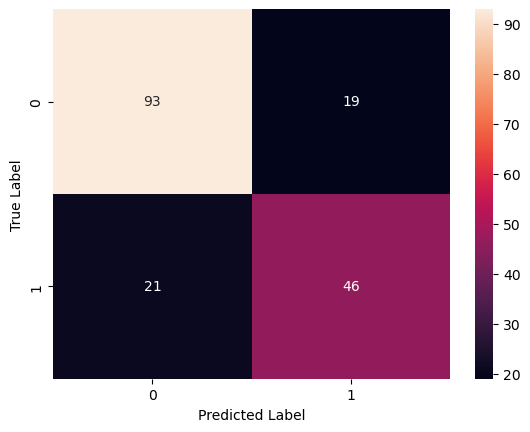

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')
plt.show()  

In [19]:
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score( y_test,y_pred, average='binary') 
precision=precision_score(y_test,y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Precision:",precision)

Accuracy: 0.776536312849162
Recall: 0.6865671641791045
F1-score: 0.696969696969697
Precision: 0.7076923076923077


randomforest

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [21]:
model.score(X_test, y_test)

0.8100558659217877

In [22]:
y_predicted = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_predicted)
cm1

array([[98, 14],
       [20, 47]], dtype=int64)

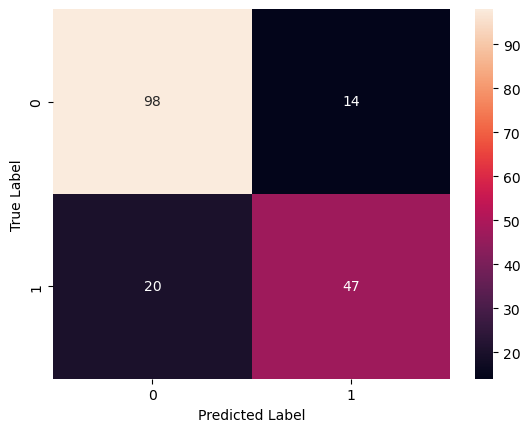

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm1, annot=True) 
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')
plt.show()  

In [25]:
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score

accuracy = accuracy_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted, average='binary')
f1 = f1_score( y_test,y_predicted, average='binary') 
precision=precision_score(y_test,y_predicted)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Precision:",precision)

Accuracy: 0.8100558659217877
Recall: 0.7014925373134329
F1-score: 0.734375
Precision: 0.7704918032786885


xgboost

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier

In [30]:
model = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1)

In [31]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
predictions = model.predict(X_test)
model.score(X_test,y_test)

0.8435754189944135